# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | ain sefra
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | st. john's
Processing Record 6 of Set 1 | merizo village
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | susuman
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | birnin kudu
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | mariental
Processing Record 13 of Set 1 | morelos
Processing Record 14 of Set 1 | bambari
Processing Record 15 of Set 1 | ouadda
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | walvis bay
Processing Record 19 of Set 1 | sao joao evangelista
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | mount gambier
Processing Record 22 of S

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-24.15,64,75,1.03,CA,1707605425
1,ain sefra,32.7500,-0.5833,8.07,78,93,2.98,DZ,1707605425
2,west island,-12.1568,96.8225,27.99,78,100,5.14,CC,1707605425
3,grytviken,-54.2811,-36.5092,3.60,85,24,8.43,GS,1707605270
4,st. john's,47.5649,-52.7093,-2.96,91,20,2.06,CA,1707605315


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-24.15,64,75,1.03,CA,1707605425
1,ain sefra,32.7500,-0.5833,8.07,78,93,2.98,DZ,1707605425
2,west island,-12.1568,96.8225,27.99,78,100,5.14,CC,1707605425
3,grytviken,-54.2811,-36.5092,3.60,85,24,8.43,GS,1707605270
4,st. john's,47.5649,-52.7093,-2.96,91,20,2.06,CA,1707605315


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

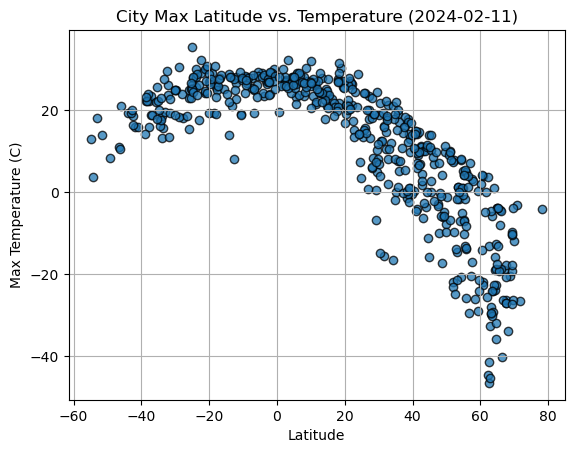

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

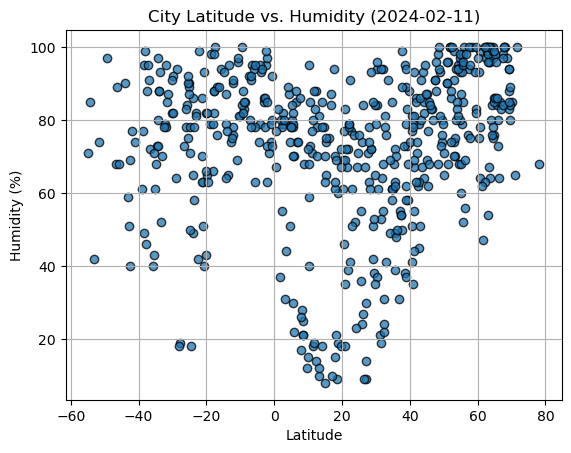

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

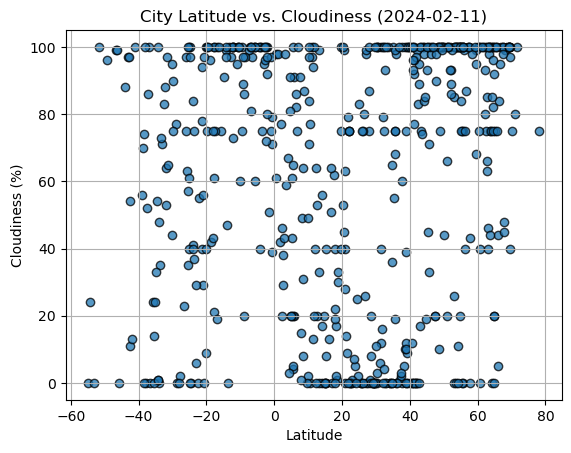

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

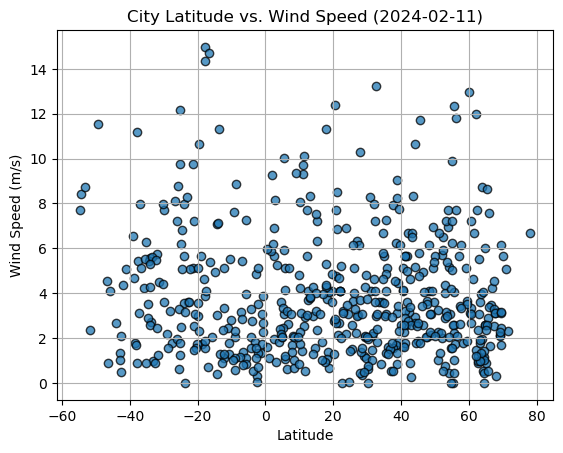

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [207]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    
    # Print r value
    print(f"The r-value is: {rvalue}")
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show plot
    plt.show()

In [208]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-24.15,64,75,1.03,CA,1707605425
1,ain sefra,32.7500,-0.5833,8.07,78,93,2.98,DZ,1707605425
4,st. john's,47.5649,-52.7093,-2.96,91,20,2.06,CA,1707605315
5,merizo village,13.2658,144.6691,27.77,81,99,8.35,GU,1707605426
6,susuman,62.7833,148.1667,-32.79,100,100,0.89,RU,1707605426


In [209]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,west island,-12.1568,96.8225,27.99,78,100,5.14,CC,1707605425
3,grytviken,-54.2811,-36.5092,3.60,85,24,8.43,GS,1707605270
10,mariental,-24.6333,17.9667,27.76,18,0,6.81,NaN,1707605401
16,walvis bay,-22.9575,14.5053,17.53,82,6,3.60,NaN,1707605402
17,sao joao evangelista,-18.5478,-42.7633,19.24,98,42,1.74,BR,1707605430


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8525136946703312


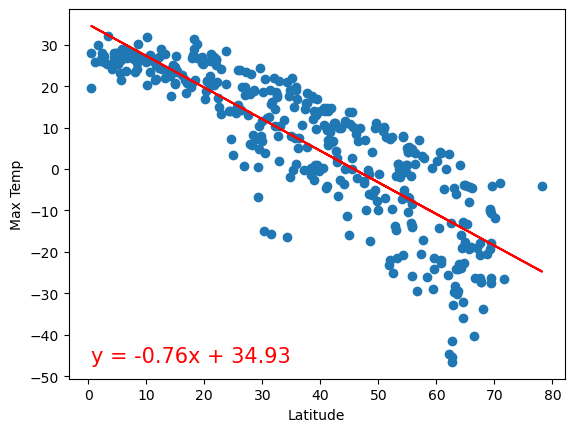

In [210]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Northern")


The r-value is: 0.6018471287747603


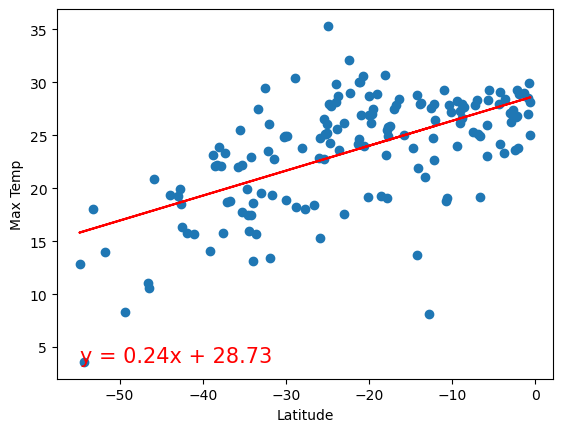

In [211]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Southern")

**Discussion about the linear relationship:**

* Northern Hemisphere: Moving away from the equator towards the North Pole, temperatures tend to decrease significantly. This relationship is strongly negative, indicating that approximately 85% of the variability in maximum temperature in the Northern Hemisphere can be explained by latitude.

* Southern Hemisphere: Moving away from the South Pole towards the equator, temperatures tend to increase moderately. This relationship is moderately strong, suggesting that approximately 60% of the variability in maximum temperature in the Southern Hemisphere can be explained by latitude.

* In summary, there is a clear pattern of temperature changes with latitude in both hemispheres, with temperatures decreasing as you move away from the equator towards the poles in the Northern Hemisphere and increasing as you move towards the equator from the poles in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4664492834423287


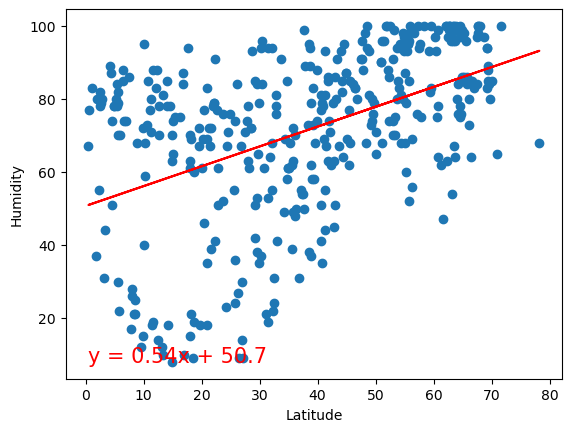

In [212]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern")

The r-value is: 0.26520862168051795


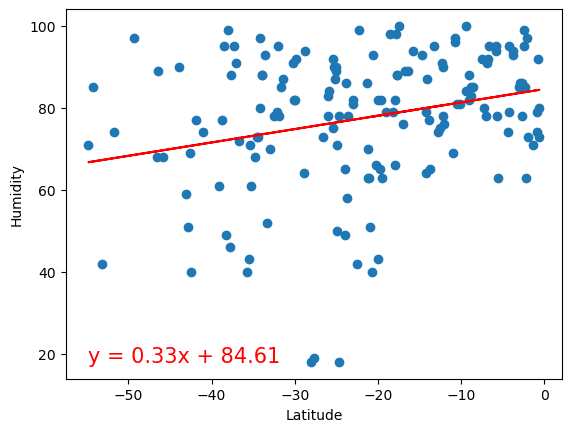

In [213]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern")

**Discussion about the linear relationship:**

* Northern Hemisphere: There is a noticeable positive correlation between latitude and humidity in the Northern Hemisphere, indicating that as we move towards higher latitudes, humidity tends to increase. This relationship, with an R-value of 0.4664, suggests a moderate association between latitude and humidity levels.

* Southern Hemisphere: Similarly, in the Southern Hemisphere, there is a positive correlation between latitude and humidity, albeit weaker than in the Northern Hemisphere. The R-value of 0.2652 indicates a less pronounced relationship, but still suggests that humidity tends to increase with increasing latitude.

* In summary, both hemispheres exhibit a trend of increasing humidity with increasing latitude, with the Northern Hemisphere showing a stronger correlation. This suggests that latitude plays a role in determining humidity levels, with potential implications for regional climate patterns.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.35115119301229997


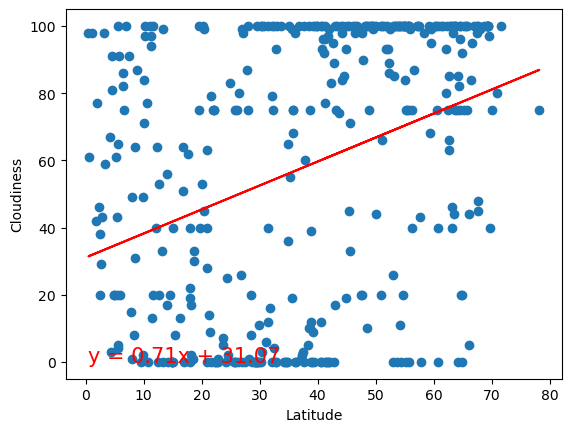

In [214]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern")

The r-value is: 0.38177799906575


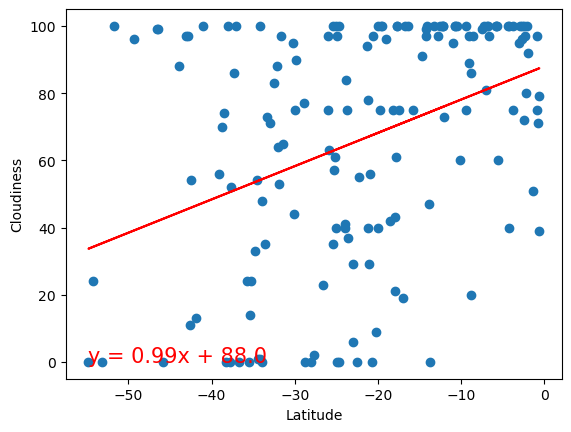

In [215]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern")

**Discussion about the linear relationship:**

* Northern Hemisphere: There is a positive correlation between latitude and cloudiness in the Northern Hemisphere, with an R-value of 0.3512. The regression line indicates that cloudiness tends to increase as latitude increases, although the relationship is not very strong. Approximately 35% of the variability in cloudiness in the Northern Hemisphere can be explained by latitude.

* Southern Hemisphere: Similarly, in the Southern Hemisphere, there is a positive correlation between latitude and cloudiness, with an R-value of 0.3818. The regression line suggests a tendency for cloudiness to increase with increasing latitude in the Southern Hemisphere. Approximately 38% of the variability in cloudiness in the Southern Hemisphere can be explained by latitude.

* In summary, both hemispheres show a trend of increasing cloudiness with increasing latitude, although the strength of the relationship is moderate at best. This suggests that latitude may play a role in determining cloudiness levels, but other factors likely contribute as well.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03742865135427144


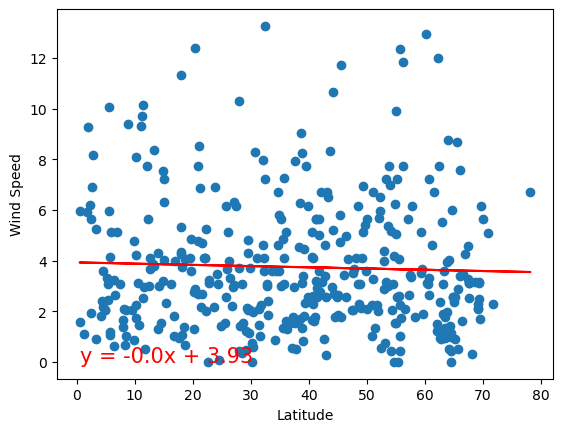

In [218]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern")

The r-value is: -0.21969360630917154


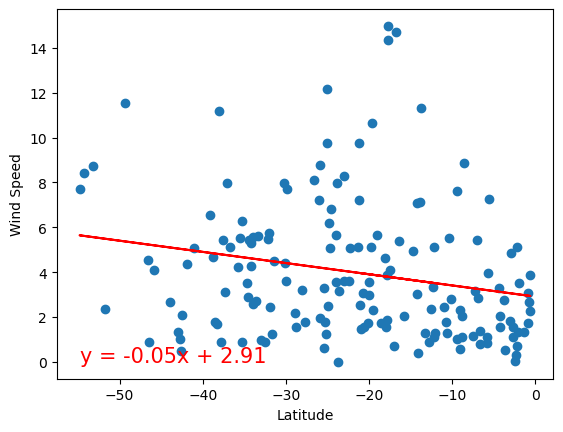

In [219]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern")

**Discussion about the linear relationship:**

* Northern Hemisphere: In the Northern Hemisphere, there is a weak negative correlation between latitude and wind speed, with an R-value of -0.0374. The regression line indicates a very slight decrease in wind speed as latitude increases, although the relationship is almost negligible. It suggests that latitude has little influence on wind speed in the Northern Hemisphere.

* Southern Hemisphere: Similarly, in the Southern Hemisphere, there is also a weak negative correlation between latitude and wind speed, with an R-value of -0.2197. The regression line suggests a slight decrease in wind speed with increasing latitude in the Southern Hemisphere, but the relationship is still relatively weak. Latitude appears to have a minor influence on wind speed in the Southern Hemisphere.

* In summary, both hemispheres exhibit a weak negative correlation between latitude and wind speed, suggesting that latitude has minimal impact on wind speed levels. Other factors such as local geography and atmospheric conditions likely play a more significant role in determining wind speed.